In [1]:
# ==============================
# Core Data Handling
# ==============================
import pandas as pd
import numpy as np

# Permanently show all columns in this session
pd.set_option('display.max_columns', None)

# Optional: also show more rows
pd.set_option('display.max_rows', 100)

# Optional: expand total width so columns don't wrap
pd.set_option('display.width', 200)

# Optional: don't truncate long text in cells
pd.set_option('display.max_colwidth', None)

# ==============================
# Visualization
# ==============================
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from matplotlib.patches import Circle, Rectangle, Arc

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, Rectangle, Arc

def shot_chart(
    ax=None,
    figsize=(6, 5),
    dpi=120,
    lw=2,
    court_bg="#0e0f11",     # dark mode "#0b1220"
    line_color="#e5e7eb",
    soft_line="#e5e7eb",
    rim_color="#d97706",
    xlim=(-300, 300),          # NEW
    ylim=(-57, 507),           # NEW (top of 3pt arc area)
    show=True
):
    """
    Draws an NBA half-court shot chart template (court only).

    Parameters
    ----------
    ax : matplotlib.axes.Axes or None
        If provided, draws onto this axis. If None, creates a new figure+axis.
    figsize : tuple
        Figure size used only if ax is None.
    dpi : int
        Figure dpi used only if ax is None.
    lw : float
        Line width for court elements.
    court_bg : str
        Background (court) color (hex or named color).
    line_color : str
        Primary line color.
    soft_line : str
        Secondary line color (free throw circle, inner box, center circle).
    rim_color : str
        Rim/hoop outline color.
    show : bool
        If True, calls plt.show() when ax is None.

    Returns
    -------
    fig, ax : (matplotlib.figure.Figure, matplotlib.axes.Axes)
        The figure and axis containing the court drawing.
    """

    # --- create axis if not provided ---
    created_fig = False
    if ax is None:
        fig, ax = plt.subplots(figsize=figsize, dpi=dpi)
        created_fig = True
        fig.patch.set_facecolor(court_bg)
    else:
        fig = ax.figure

    ax.set_facecolor(court_bg)
    ax.set_aspect('equal')

    # hoop
    hoop = Circle((0, 0), radius=9, edgecolor=rim_color, linewidth=lw, fill=False)
    ax.add_patch(hoop)

    # backboard
    backboard = Rectangle(
        (-36, -15), width=72, height=0.1,
        edgecolor=line_color, facecolor=line_color, linewidth=lw
    )
    ax.add_patch(backboard)

    # outerbox
    outer_box = Rectangle(
        (-96, -57), width=192, height=228,
        lw=lw, edgecolor=line_color, fill=False
    )
    ax.add_patch(outer_box)

    # innerbox
    inner_box = Rectangle(
        (-72, -57), width=144, height=228,
        lw=lw, edgecolor=soft_line, fill=False
    )
    ax.add_patch(inner_box)

    # Top half of the free throw circle (solid)
    top_free_throw = Arc(
        (0, 171), 144, 144, theta1=0, theta2=180,
        linewidth=lw, color=soft_line
    )
    ax.add_patch(top_free_throw)

    # Bottom half (dashed)
    bottom_free_throw = Arc(
        (0, 171), 144, 144, theta1=180, theta2=0,
        linewidth=lw, color=soft_line, linestyle=(0, (4, 4))
    )
    ax.add_patch(bottom_free_throw)

    # restricted curve
    restricted_curve = Arc(
        (0, 0), 96, 96, theta1=0, theta2=180,
        linewidth=lw, color=line_color
    )
    ax.add_patch(restricted_curve)

    # --- 3PT geometry ---
    r_3pt = 285
    x_corner = 264
    baseline_y = -57
    y_intersect = np.sqrt(r_3pt**2 - x_corner**2)
    theta = np.degrees(np.arctan2(y_intersect, x_corner))

    # corner 3 lines
    ax.vlines(x=x_corner,  ymin=baseline_y, ymax=y_intersect, color=line_color, linewidth=lw)
    ax.vlines(x=-x_corner, ymin=baseline_y, ymax=y_intersect, color=line_color, linewidth=lw)

    # 3pt arc
    three_pt_curve = Arc(
        (0, 0), 2*r_3pt, 2*r_3pt,
        theta1=theta, theta2=180-theta,
        color=line_color, linewidth=lw
    )
    ax.add_patch(three_pt_curve)

    # center circle
    center_circle = Arc(
        (0, 507), 144, 144, theta1=180, theta2=0,
        linewidth=lw, color=soft_line
    )
    ax.add_patch(center_circle)

    # midcourt line + baseline
    ax.hlines(y=507, xmin=-300, xmax=300, color=line_color, linewidth=lw)
    ax.hlines(y=-57, xmin=-300, xmax=300, color=line_color, linewidth=lw)

    # sidelines
    ax.vlines(x=300, ymin=-57, ymax=507, color=line_color, linewidth=lw)
    ax.vlines(x=-300, ymin=-57, ymax=507, color=line_color, linewidth=lw)

    # improve line aesthetics (no lw change)
    for artist in ax.patches + ax.lines:
        try:
            artist.set_capstyle("round")
            artist.set_joinstyle("round")
            artist.set_antialiased(True)
        except Exception:
            pass

    # ax.set_xlim(-300, 300)
    # ax.set_ylim(-57, 507)
    ax.set_xlim(*xlim)
    ax.set_ylim(*ylim)
    ax.set_aspect(1)
    # ax.axis('off')

    # --- axis styling (WHITE AXES) ---
    for spine in ax.spines.values():
        spine.set_color("white")
        spine.set_linewidth(1.2)

    ax.tick_params(
        axis="both",
        colors="white",      # tick color
        labelcolor="white",  # tick label color
        length=6,
        width=1.2
    )

    ax.xaxis.label.set_color("white")
    ax.yaxis.label.set_color("white")

    # show only if we created the figure here
    if created_fig and show:
        plt.show()

    return fig, ax

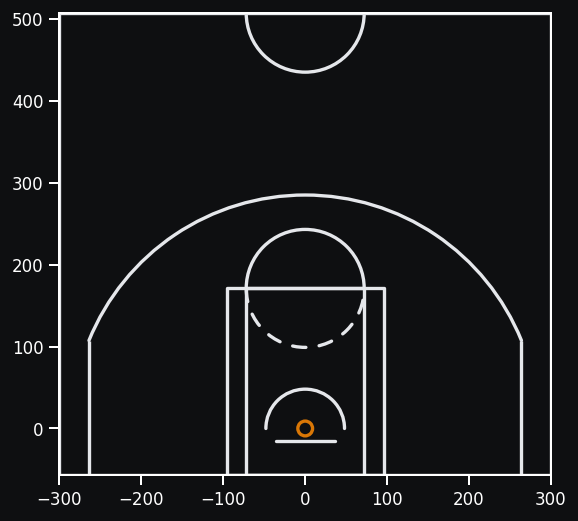

(<Figure size 720x600 with 1 Axes>, <Axes: >)

In [3]:
shot_chart()

In [4]:


shots_file_path = r"D:\My Files\LiU\SAS Hackathon 2026\sas-curiosity-cup-2026\data\tracking\shots\shots_fixed.csv"

shots = pd.read_csv(shots_file_path)


In [7]:
# player_name = "Mike Miller"
player_name = "LeBron James"

player_df = shots[shots["PLAYER_NAME"] == player_name]
# player_df = shots

# player_df = player_df[(shots["LOC_X"] >= 200) & (shots["LOC_Y"] <= 100)]

# player_df = player_df[(player_df["SHOT_TYPE"] == "3PT Field Goal")]

# player_df = player_df[(player_df["SHOT_ZONE_AREA"] == "Right Side(R)")]

# player_df = player_df[(player_df["SHOT_ZONE_AREA"] == "Left Side(L)") | (player_df["SHOT_ZONE_AREA"] == "Right Side(R)")]

x = player_df["LOC_X"].to_numpy() * 1.2
y = player_df["LOC_Y"].to_numpy() * 1.2






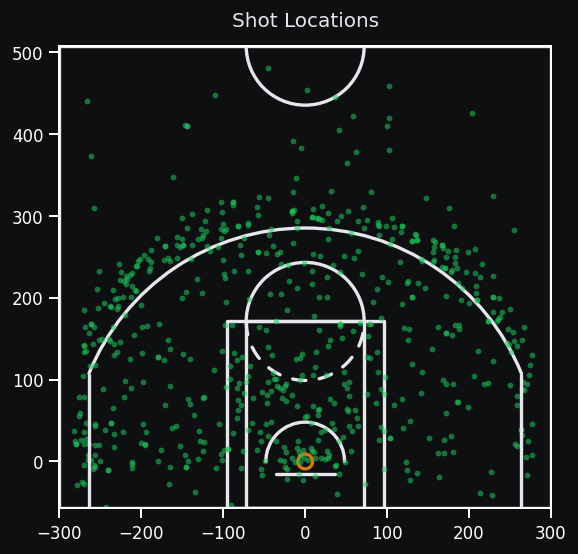

In [8]:
fig, ax = shot_chart(show=False)

ax.scatter(
    x, y,
    s=12,                    # point size
    c="#22c55e",              # green dots (made+missed)
    alpha=0.55,
    linewidths=0
)

ax.set_title(f"Shot Locations", color="#e5e7eb", pad=12)

plt.show()

c:\Users\Admin\anaconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:4859: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


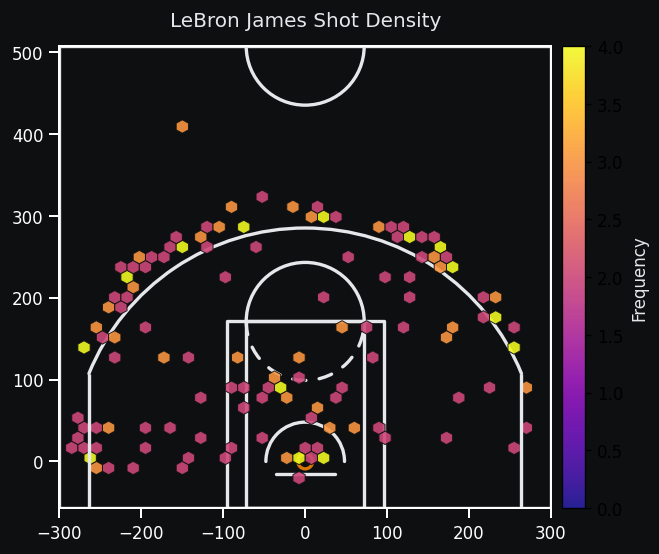

In [9]:
#Heat Map
fig, ax = shot_chart(show=False)

heatmap = ax.hexbin(x, y, gridsize=40, extent=(-300, 300, -57, 507), mincnt=2, alpha=0.9, linewidths=0.6, cmap="plasma",  edgecolors="#111111")

heatmap.set_clim(0, np.percentile(heatmap.get_array(), 98))

# --- optional: add colorbar ---
cb = fig.colorbar(heatmap, ax=ax, fraction=0.046, pad=0.02)
cb.set_label("Frequency" , color="#e5e7eb")

# --- optional: title ---
ax.set_title(f"{player_name} Shot Density", color="#e5e7eb", pad=12)

plt.show()